<a href="https://colab.research.google.com/github/jafcn09/IA_1/blob/main/07_01_variacio%CC%81n_learning_rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ver mas ejemplos en
`https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/PiecewiseConstantDecay`


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

## no learning rate scheduling

In [ ]:
n_epochs = 25

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.01)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer = optimizer, metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 10s 5ms/step - loss: 0.4889 - accuracy: 0.8286 - val_loss: 0.3957 - val_accuracy: 0.8634
Epoch 2/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3772 - accuracy: 0.8658 - val_loss: 0.3626 - val_accuracy: 0.8702
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3416 - accuracy: 0.8772 - val_loss: 0.3733 - val_accuracy: 0.8652
Epoch 4/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3188 - accuracy: 0.8857 - val_loss: 0.3401 - val_accuracy: 0.8784
Epoch 5/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3009 - accuracy: 0.8923 - val_loss: 0.3346 - val_accuracy: 0.8784
Epoch 6/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2842 - accuracy: 0.8976 - val_loss: 0.3332 - val_accuracy: 0.8822
Epoch 7/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2722 - accuracy: 0.9013 - val_loss: 0.3328 - val_accur

# power scheduling

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.01,decay=1e-4)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4896 - accuracy: 0.8277 - val_loss: 0.4095 - val_accuracy: 0.8596
Epoch 2/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3825 - accuracy: 0.8646 - val_loss: 0.3751 - val_accuracy: 0.8698
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3499 - accuracy: 0.8760 - val_loss: 0.3744 - val_accuracy: 0.8678
Epoch 4/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3284 - accuracy: 0.8829 - val_loss: 0.3514 - val_accuracy: 0.8794
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3131 - accuracy: 0.8891 - val_loss: 0.3453 - val_accuracy: 0.8784
Epoch 6/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2991 - accuracy: 0.8944 - val_loss: 0.3434 - val_accuracy: 0.8810
Epoch 7/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2890 - accuracy: 0.8971 - val_loss: 0.3372 - val_accuracy:

# inverse time decay

In [ ]:
initial_learning_rate = 0.1
decay_steps = 1.0   # 20 * len(X_train) // 32
decay_rate = 0.5
learning_rate_fn = keras.optimizers.schedules.InverseTimeDecay(initial_learning_rate, decay_steps, decay_rate)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate_fn),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6266 - accuracy: 0.7853 - val_loss: 0.5846 - val_accuracy: 0.8000
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5807 - accuracy: 0.7979 - val_loss: 0.5712 - val_accuracy: 0.8058
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5714 - accuracy: 0.8006 - val_loss: 0.5645 - val_accuracy: 0.8078
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5660 - accuracy: 0.8021 - val_loss: 0.5600 - val_accuracy: 0.8088
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5622 - accuracy: 0.8038 - val_loss: 0.5567 - val_accuracy: 0.8100
Epoch 6/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5593 - accuracy: 0.8051 - val_loss: 0.5541 - val_accuracy: 0.8104
Epoch 7/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5570 - accuracy: 0.8058 - val_loss: 0.5520 - val_accuracy:

### alternativamente usando callbacks

In [ ]:
def inverse_time_decay(initial_learning_rate, decay_steps, decay_rate):
  def Inverse_time_decay_scheduler(epoch):
    return float(tf.keras.backend.get_value(keras.optimizers.schedules.InverseTimeDecay(initial_learning_rate, decay_steps, decay_rate)(epoch)))
  return Inverse_time_decay_scheduler

initial_learning_rate = 0.1
decay_steps = 1.0 # 20 * len(X_train) // 32
decay_rate = 0.5

InverseTimeDecay_fn = inverse_time_decay(initial_learning_rate, decay_steps, decay_rate)


In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(InverseTimeDecay_fn)

history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4995 - accuracy: 0.8252 - val_loss: 0.4260 - val_accuracy: 0.8526 - lr: 0.1000
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3369 - accuracy: 0.8751 - val_loss: 0.3447 - val_accuracy: 0.8760 - lr: 0.0667
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2855 - accuracy: 0.8939 - val_loss: 0.3551 - val_accuracy: 0.8720 - lr: 0.0500
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2544 - accuracy: 0.9058 - val_loss: 0.3132 - val_accuracy: 0.8870 - lr: 0.0400
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2311 - accuracy: 0.9140 - val_loss: 0.2921 - val_accuracy: 0.8954 - lr: 0.0333
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2110 - accuracy: 0.9221 - val_loss: 0.3081 - val_accuracy: 0.8940 - lr: 0.0286
Epoch 7/25
1719/1719 [==============================] - 5s

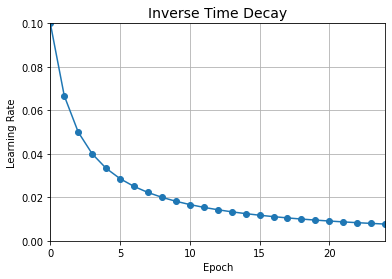

In [ ]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, initial_learning_rate])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Inverse Time Decay", fontsize=14)
plt.grid(True)
plt.show()

## exponential decay

In [ ]:
initial_learning_rate = 0.1

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1,
    decay_rate=0.5,
    staircase=True)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 1.4971 - accuracy: 0.5942 - val_loss: 1.4586 - val_accuracy: 0.6046
Epoch 2/25
1719/1719 [==============================] - 6s 3ms/step - loss: 1.4925 - accuracy: 0.5953 - val_loss: 1.4586 - val_accuracy: 0.6046
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 1.4925 - accuracy: 0.5953 - val_loss: 1.4586 - val_accuracy: 0.6046
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 1.4925 - accuracy: 0.5953 - val_loss: 1.4586 - val_accuracy: 0.6046
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 1.4925 - accuracy: 0.5953 - val_loss: 1.4586 - val_accuracy: 0.6046
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 1.4925 - accuracy: 0.5953 - val_loss: 1.4586 - val_accuracy: 0.6046
Epoch 7/25
1719/1719 [==============================] - 6s 3ms/step - loss: 1.4925 - accuracy: 0.5953 - val_loss: 1.4586 - val_accuracy:

### alternativamente usando callbacks

In [ ]:
def exponential_decay(initial_learning_rate, decay_steps, decay_rate, staircase):
  def exponential_decay_scheduler(epoch):
    return float(tf.keras.backend.get_value(tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate, decay_steps, decay_rate, staircase)(epoch)))
  return exponential_decay_scheduler

exponential_decay_fn = exponential_decay(initial_learning_rate=0.1,decay_steps=1, decay_rate=0.5, staircase=True)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4969 - accuracy: 0.8236 - val_loss: 0.4179 - val_accuracy: 0.8484 - lr: 0.1000
Epoch 2/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3230 - accuracy: 0.8808 - val_loss: 0.3307 - val_accuracy: 0.8810 - lr: 0.0500
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2693 - accuracy: 0.9008 - val_loss: 0.3247 - val_accuracy: 0.8800 - lr: 0.0250
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2416 - accuracy: 0.9112 - val_loss: 0.3028 - val_accuracy: 0.8884 - lr: 0.0125
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2273 - accuracy: 0.9170 - val_loss: 0.2986 - val_accuracy: 0.8902 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2189 - accuracy: 0.9201 - val_loss: 0.2987 - val_accuracy: 0.8904 - lr: 0.0031
Epoch 7/25
1719/1719 [==============================] - 6s

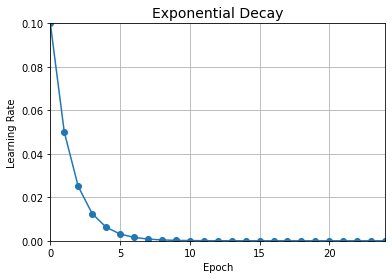

In [ ]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, initial_learning_rate])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Decay", fontsize=14)
plt.grid(True)
plt.show()

## Piecewise Constant Scheduling

In [ ]:
step = tf.Variable(0, trainable=False)
boundaries =  [5, 15]
values = [0.01, 0.005, 0.001]
lr_schedule = keras.optimizers.schedules.PiecewiseConstantDecay(boundaries, values)


model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6520 - accuracy: 0.7749 - val_loss: 0.5222 - val_accuracy: 0.8142
Epoch 2/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5010 - accuracy: 0.8261 - val_loss: 0.4668 - val_accuracy: 0.8350
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4591 - accuracy: 0.8399 - val_loss: 0.4464 - val_accuracy: 0.8442
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4346 - accuracy: 0.8485 - val_loss: 0.4278 - val_accuracy: 0.8498
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4174 - accuracy: 0.8555 - val_loss: 0.4154 - val_accuracy: 0.8554
Epoch 6/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4039 - accuracy: 0.8594 - val_loss: 0.4071 - val_accuracy: 0.8582
Epoch 7/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3932 - accuracy: 0.8634 - val_loss: 0.3985 - val_accuracy:

### alternativamente usando callbacks

In [ ]:
def piecewiseConstantDecay(boundaries, values):
  def piecewiseConstantDecay_scheduler(epoch):
    return float(tf.keras.backend.get_value(keras.optimizers.schedules.PiecewiseConstantDecay(boundaries, values)(epoch)))
  return piecewiseConstantDecay_scheduler

piecewiseConstantDecay_fn = piecewiseConstantDecay(boundaries, values)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

lr_scheduler = keras.callbacks.LearningRateScheduler(piecewiseConstantDecay_fn)

history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4857 - accuracy: 0.8287 - val_loss: 0.4041 - val_accuracy: 0.8578 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3783 - accuracy: 0.8663 - val_loss: 0.3701 - val_accuracy: 0.8736 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3439 - accuracy: 0.8756 - val_loss: 0.3789 - val_accuracy: 0.8686 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3206 - accuracy: 0.8846 - val_loss: 0.3460 - val_accuracy: 0.8814 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3034 - accuracy: 0.8906 - val_loss: 0.3412 - val_accuracy: 0.8784 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2865 - accuracy: 0.8968 - val_loss: 0.3390 - val_accuracy: 0.8820 - lr: 0.0100
Epoch 7/25
1719/1719 [==============================] - 5s

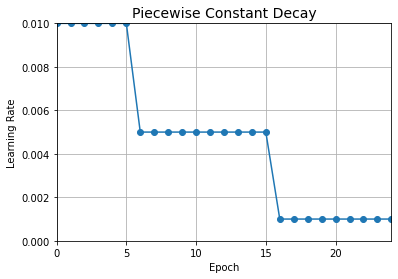

In [ ]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, values[0]])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Decay", fontsize=14)
plt.grid(True)
plt.show()

## Performance scheduling

In [ ]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

#model = keras.models.Sequential([
#    keras.layers.Flatten(input_shape=[28, 28]),
#    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
#    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
#    keras.layers.Dense(10, activation="softmax")
#])
learning_rate=0.02
optimizer = keras.optimizers.SGD(learning_ratelearning_rate, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6519 - accuracy: 0.8091 - val_loss: 0.5699 - val_accuracy: 0.8416 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5278 - accuracy: 0.8381 - val_loss: 0.5939 - val_accuracy: 0.8406 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5268 - accuracy: 0.8437 - val_loss: 0.5716 - val_accuracy: 0.8452 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5213 - accuracy: 0.8492 - val_loss: 0.4932 - val_accuracy: 0.8604 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5184 - accuracy: 0.8528 - val_loss: 0.4931 - val_accuracy: 0.8514 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5129 - accuracy: 0.8557 - val_loss: 0.5426 - val_accuracy: 0.8496 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================] - 6s

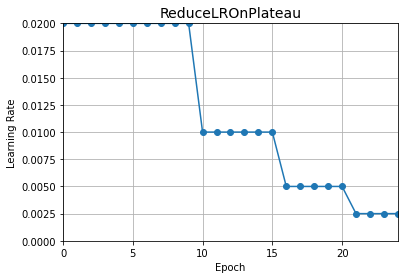

In [ ]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, learning_rate])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("ReduceLROnPlateau", fontsize=14)
plt.grid(True)
plt.show()

# Cyclical Learning rate

In [ ]:
pip install -q -U tensorflow_addons

In [ ]:
import tensorflow_addons as tfa

In [ ]:
BATCH_SIZE = 32
INIT_LR = 1e-4
MAX_LR = 1e-2

In [ ]:
#steps_per_epoch = len(x_train) // BATCH_SIZE
steps_per_epoch=1
lr_schedule = tfa.optimizers.CyclicalLearningRate(initial_learning_rate=INIT_LR,
                                                  maximal_learning_rate=MAX_LR,
                                                  scale_fn=lambda x: 1/(2.**(x-1)),
                                                  step_size=2 * steps_per_epoch)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 9s 5ms/step - loss: 1.0675 - accuracy: 0.6446 - val_loss: 0.8444 - val_accuracy: 0.7114
Epoch 2/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7886 - accuracy: 0.7319 - val_loss: 0.7152 - val_accuracy: 0.7498
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6977 - accuracy: 0.7595 - val_loss: 0.6532 - val_accuracy: 0.7730
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6470 - accuracy: 0.7749 - val_loss: 0.6139 - val_accuracy: 0.7884
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6132 - accuracy: 0.7870 - val_loss: 0.5875 - val_accuracy: 0.7956
Epoch 6/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5884 - accuracy: 0.7952 - val_loss: 0.5673 - val_accuracy: 0.8030
Epoch 7/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5692 - accuracy: 0.8025 - val_loss: 0.5511 - val_accurac

### alternativamente usando callbacks


In [ ]:
def CyclicalLearningRateDecay(initial_learning_rate, maximal_learning_rate,scale_fn,step_size):
  def CyclicalLearningRateDecay_scheduler(epoch):
    return float(tfa.optimizers.CyclicalLearningRate(initial_learning_rate,maximal_learning_rate,scale_fn=lambda x: 1/(2.**(x-1)),step_size=2 * steps_per_epoch)(epoch))
  return CyclicalLearningRateDecay_scheduler

CyclicalLearningRate_fn = CyclicalLearningRateDecay(INIT_LR,
                                                    MAX_LR,
                                                    scale_fn=lambda x: 1/(2.**(x-1)),
                                                    step_size=2 * steps_per_epoch)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

lr_scheduler = keras.callbacks.LearningRateScheduler(CyclicalLearningRate_fn)

history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 8s 5ms/step - loss: 1.2936 - accuracy: 0.5618 - val_loss: 0.8924 - val_accuracy: 0.7082 - lr: 1.0000e-04
Epoch 2/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4990 - accuracy: 0.8254 - val_loss: 0.4150 - val_accuracy: 0.8586 - lr: 0.0050
Epoch 3/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4064 - accuracy: 0.8563 - val_loss: 0.4030 - val_accuracy: 0.8544 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3527 - accuracy: 0.8758 - val_loss: 0.3623 - val_accuracy: 0.8724 - lr: 0.0050
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3307 - accuracy: 0.8843 - val_loss: 0.3587 - val_accuracy: 0.8750 - lr: 1.0000e-04
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3307 - accuracy: 0.8838 - val_loss: 0.3577 - val_accuracy: 0.8752 - lr: 0.0026
Epoch 7/25
1719/1719 [===========================

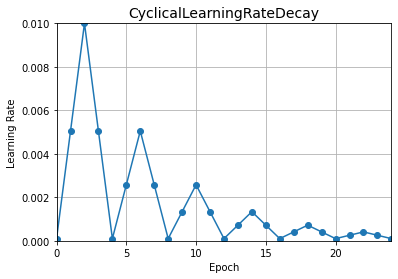

In [ ]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, MAX_LR])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("CyclicalLearningRateDecay", fontsize=14)
plt.grid(True)
plt.show()